In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [7]:
def get_paths(node, var_parm, precision):
    
    data_paths = []

    if var_parm == "cores":
        end_parm = 5
    else:
        end_parm = 4
    
    for dir_name in [el for el in os.listdir("../"+node) if el[:end_parm] == var_parm]:
        for file_name in os.listdir("../"+node+"/"+dir_name):
            if file_name[-5] == precision:
                data_paths.append("../"+node+"/"+dir_name+"/"+file_name)

    return data_paths

In [5]:
def plot_data(data_paths, var_parm):


    # converting csv files in dataframes and computing average performance

    headers = ["cores", "mat_size", "time(s)", "GFLOPS"]

    if var_parm == "cores":
        var_parm_head = "cores"
    else:
        var_parm_head = "mat_size"

    df = []
    for file_path in data_paths:
        dat = pd.read_csv(file_path, names=headers, comment='#').drop(0)
        dat = pd.DataFrame(data={var_parm_head: np.array(dat[var_parm_head], dtype=int),
                    "GFLOPS": np.array(dat["GFLOPS"], dtype=float)})
        new_dat = dat.groupby([var_parm_head]).mean().reset_index()
        df.append(new_dat)

    
    # getting labels for the plot

    if var_parm == "cores":
        position = 16
    else:
        position = 15

    file_names = []
    for file_path in data_paths:
        if file_path[position] == "c":
            if file_path[-8:-6] == "kl":
                file_names.append("MKL_close")
            elif file_path[-8:-6] == "as":
                file_names.append("openBLAS_close")
            else:
                file_names.append("BLIS_close")
        else:
            if file_path[-8:-6] == "kl":
                file_names.append("MKL_spread")
            elif file_path[-8:-6] == "as":
                file_names.append("openBLAS_spread")
            else:
                file_names.append("BLIS_spread")

    
    # plotting data

    fig, ax = plt.subplots()
    for file in zip(df, file_names):
        ax.plot(file[0][var_parm_head], file[0]["GFLOPS"], label=file[1])
        
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-small')

    plt.show()


    return

# EPYC

## Cores scalability

### Single point precision

In [8]:
data_paths = get_paths("EPYC", "cores", "f")

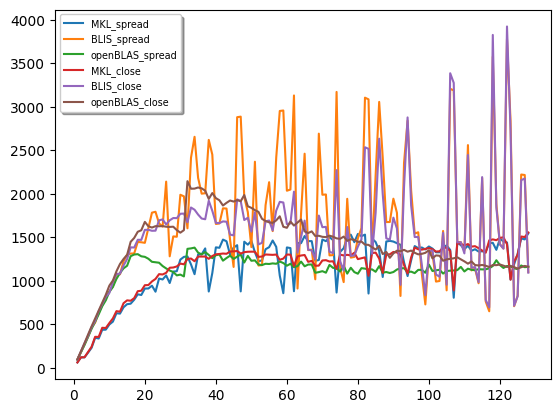

In [9]:
plot_data(data_paths, "cores")

### Double point precision

In [215]:
data_paths = get_paths("EPYC", "cores", "d")

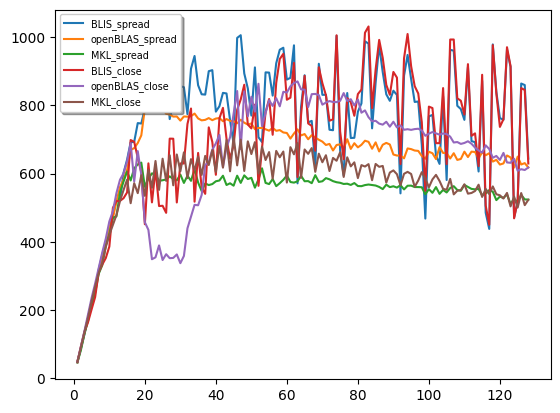

In [216]:
plot_data(data_paths, "cores")

## Size scalability

### Single point precision

In [11]:
data_paths = get_paths("EPYC", "size", "f")

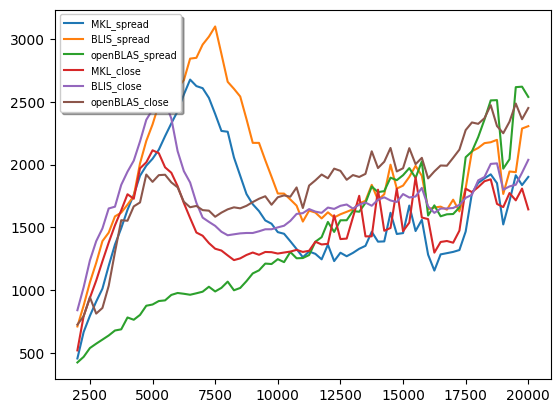

In [12]:
plot_data(data_paths, "size")

### Double point precision

In [13]:
data_paths = get_paths("EPYC", "size", "d")

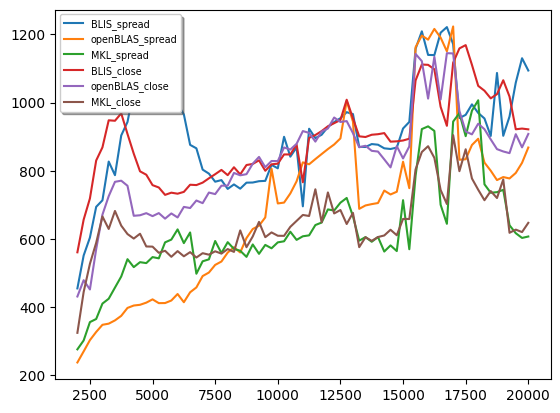

In [14]:
plot_data(data_paths, "size")

# THIN

## Cores scalability

### Single point precision

In [15]:
data_paths = get_paths("THIN", "cores", "f")

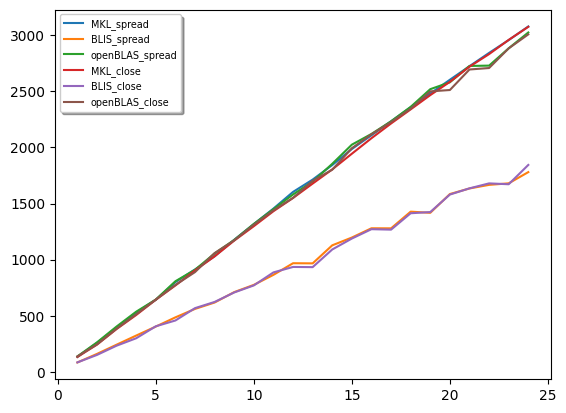

In [16]:
plot_data(data_paths, "cores")

### Double point precision

In [24]:
data_paths = get_paths("THIN", "cores", "d")
print(data_paths)

['../THIN/cores_w_spread_cores/blis_d.csv', '../THIN/cores_w_spread_cores/oblas_d.csv', '../THIN/cores_w_spread_cores/mkl_d.csv', '../THIN/cores_w_close_cores/blis_d.csv', '../THIN/cores_w_close_cores/oblas_d.csv', '../THIN/cores_w_close_cores/mkl_d.csv']


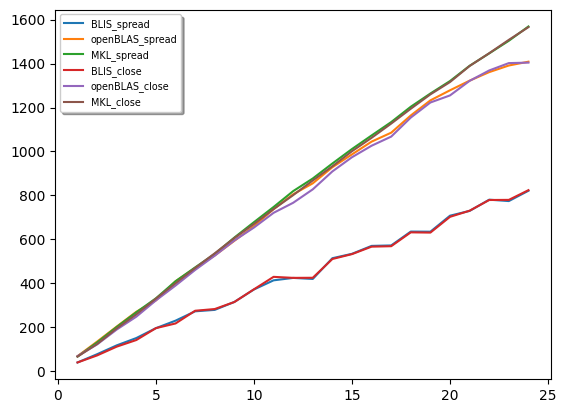

In [18]:
plot_data(data_paths, "cores")

## Size scalability

### Single point precision

In [23]:
data_paths = get_paths("THIN", "size", "f")
print(data_paths)

['../THIN/size_w_spread_cores/mkl_f.csv', '../THIN/size_w_spread_cores/blis_f.csv', '../THIN/size_w_spread_cores/oblas_f.csv', '../THIN/size_w_close_cores/mkl_f.csv', '../THIN/size_w_close_cores/blis_f.csv', '../THIN/size_w_close_cores/oblas_f.csv']


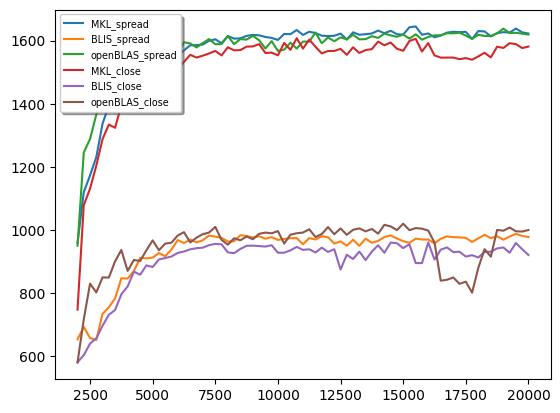

In [20]:
plot_data(data_paths, "size")

### Double point precision

In [21]:
data_paths = get_paths("THIN", "size", "d")

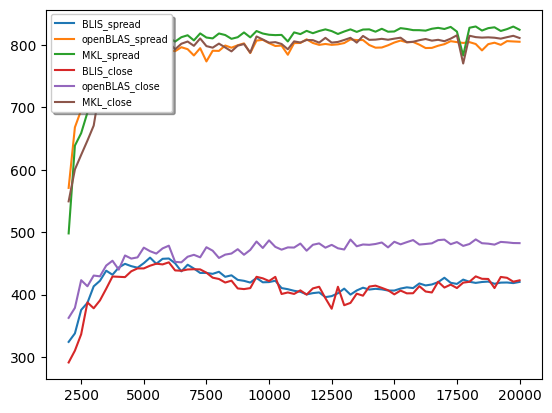

In [22]:
plot_data(data_paths, "size")